In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ex = pd.read_excel("/content/newdf.xlsx")
ex

,data
0,58.340440
1,64.406490
2,50.002287
3,56.046651
4,52.935118
...,...
60,52.046689
61,58.281120
62,63.888003
63,58.283585


In [5]:
df = pd.DataFrame(ex)
df

,data
0,58.340440
1,64.406490
2,50.002287
3,56.046651
4,52.935118
...,...
60,52.046689
61,58.281120
62,63.888003
63,58.283585


In [6]:
#q1) Which of the following statements is/ are true?
# a,c
df.describe()

,data
count,65.000000
mean,58.847362
std,5.963677
min,50.002287
25%,53.396608
50%,58.340440
75%,63.846452
max,69.777222


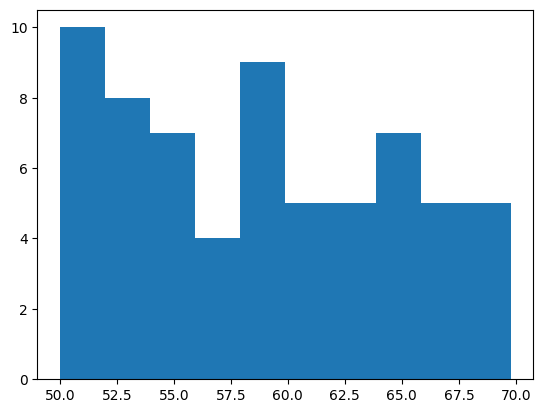

In [7]:
#Based on the descriptive statistics and histogram of the sample data, which
#of the following statements could be true?
plt.hist(df.data)
plt.show()
# The sample data does not come from a symmetric distribution

In [8]:
#What could be the parent distribution of the sample data based on the histogram?
'''The data are spread roughly evenly across the range 50–70.
The bars have roughly similar heights, with no clear central peak (as in a normal or binomial distribution), and no long tail (as in geometric or Poisson).
This shape suggests that all intervals are almost equally likely.'''
#Uniform distribution

In [9]:
#Some additional descriptive statistics
stats_labels = ['Variance Observed', 'Skew Observed', 'Kurt Observed']
stats_values = [round(df['data'].var(), 2), round(df['data'].skew(),2), round(df['data'].kurt(),2)]
print(set(zip(stats_labels, stats_values)))

'''Skew = 0.2 → roughly symmetric
Kurtosis = -1.25 → flatter than normal (platykurtic)
Variance = 35.57
For a uniform distribution, the parameters are its minimum (a) and maximum (b) values.
These parameters can be estimated directly from the range of the sample data — not from standard deviation, median, skew, or kurtosis.
So, none of the listed methods (standard deviation, median, skew/kurtosis) directly estimate the parameters of a uniform distribution.
Correct answer:
None of the above'''

{('Kurt Observed', np.float64(-1.25)), ('Skew Observed', np.float64(0.2)), ('Variance Observed', 35.57)}


In [10]:
#Importing the required statistical packages
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm, uniform, poisson
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import chisquare
from scipy.stats import chi2

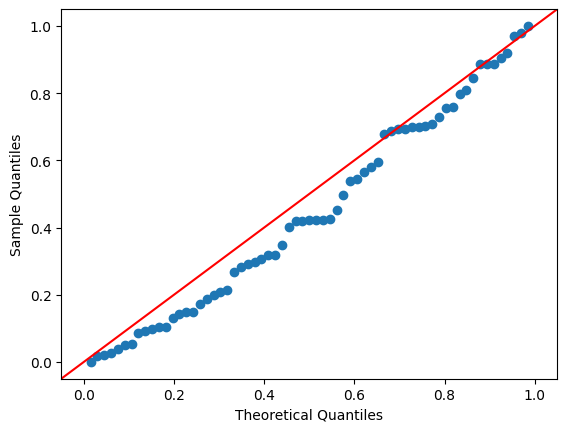

In [12]:
# Developing a qq plot to compare the quantiles (amplify the differences in the tails)
#uniform
sm.qqplot(df['data'], stats.uniform, fit = True, line = '45')
plt.show()
# - ends fit perfectly

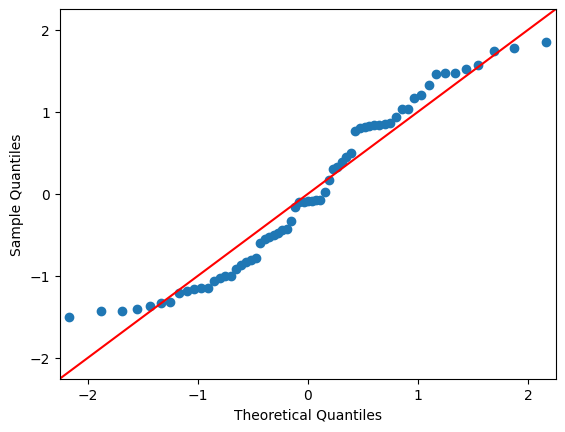

In [14]:
# Normal distribution
sm.qqplot(df['data'], stats.norm, fit = True, line = '45')
plt.show()


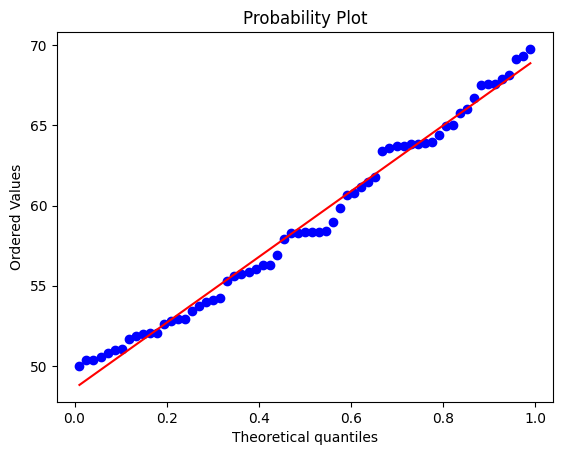

In [15]:
# Developing a pp plot to compare the quantiles (amplify the differences in the centre)
stats.probplot(df['data'], dist='uniform', plot=plt)
plt.show()


In [ ]:
# NULL HYPOTHESIS: The given data follows Uniform distribution.
# ALTERNATE HYPOTHESIS: The given data does not follow Uniform distribution


In [16]:
#Step-1 in CHi-Square GOF: Create Bins
df['Bins'] = pd.cut(df['data'], bins=10)
print(df)

         data              Bins
0   58.340440   (57.912, 59.89]
1   64.406490  (63.845, 65.822]
2   50.002287   (49.983, 51.98]
3   56.046651  (55.935, 57.912]
4   52.935118   (51.98, 53.957]
..        ...               ...
60  52.046689   (51.98, 53.957]
61  58.281120   (57.912, 59.89]
62  63.888003  (63.845, 65.822]
63  58.283585   (57.912, 59.89]
64  50.999069   (49.983, 51.98]

[65 rows x 2 columns]


In [17]:
#Step-2 in CHi-Square GOF: Count Number of Observations in Each Bin
df_2 = pd.DataFrame()
df_2 ["Observed Frequency"] = (df.groupby('Bins').count())
df_2

/tmp/ipython-input-379125594.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2 ["Observed Frequency"] = (df.groupby('Bins').count())


,Observed Frequency
Bins,
"(49.983, 51.98]",10
"(51.98, 53.957]",8
"(53.957, 55.935]",7
"(55.935, 57.912]",4
"(57.912, 59.89]",9
"(59.89, 61.867]",5
"(61.867, 63.845]",5
"(63.845, 65.822]",7
"(65.822, 67.8]",5


In [18]:
#Step-3 in CHi-Square GOF: Determine the Expected Number of Observations in Each Bin
mean = df_2["Observed Frequency"].mean()
df_2["Expected Frequency"] = mean
df_2


,Observed Frequency,Expected Frequency
Bins,,
"(49.983, 51.98]",10,6.5
"(51.98, 53.957]",8,6.5
"(53.957, 55.935]",7,6.5
"(55.935, 57.912]",4,6.5
"(57.912, 59.89]",9,6.5
"(59.89, 61.867]",5,6.5
"(61.867, 63.845]",5,6.5
"(63.845, 65.822]",7,6.5
"(65.822, 67.8]",5,6.5


In [19]:
#Step-4A in CHi-Square GOF: Determine the Test Statistics and P-Value
chisquare(df_2['Observed Frequency'], df_2['Expected Frequency'])


Power_divergenceResult(statistic=np.float64(5.615384615384615), pvalue=np.float64(0.7777090957341174))

In [ ]:
# GUIDE FOR INFERENCE IF CONCLUSION IS GOING TO BE BASED ON STEP-4A
# REJECT the Null if the p-value < level of significant
# DO NOT REJECT the Null if the p-value >= level of significant
# Say the level of significance is 5%, then for given data set, p-value (0.694)>>0.05 --> DO NOT REJECT THE NULL
# Note: For any level of significance ~>70%, we do not reject the null for the current data set.

#pvalue 0.77 < significance 0.95 implies reject the null hypothesis

In [23]:
#Step-4B in CHi-Square GOF: Determine the Tabulated Value of the Test Statistic
chi2.ppf(0.95,64)

# GUIDE FOR INFERENCE IF CONCLUSION IS GOING TO BE BASED ON STEP-4B

# REJECT the Null if the "Tabluated Test Statistic Value" < "Computed Test Statistic Value"
# DO NOT REJECT the Null if the "Tabluated Test Statistic Value" >= "Computed Test Statistic Value"


np.float64(83.67526074272097)

In [ ]:
#tabulated 83.67 > computed 5.61 -> do not rejetc h0

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [31]:
dfr = pd.read_csv("/content/sales.csv")
dfr.head()

,year,Sales
0,1970,299
1,1971,668
2,1972,1151
3,1973,1704
4,1974,2477


In [36]:
X= dfr.iloc[:,0].values
y= dfr.iloc[:,1].values
X,y

(array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
        1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
        1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
        2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
        2014, 2015, 2016, 2017, 2018, 2019, 2020]),
 array([  299,   668,  1151,  1704,  2477,  2898,  3962,  4000,  4148,
         4503,  5256,  6334,  6519,  7317,  7690,  7919,  8383,  9875,
        11980, 13327, 13739, 14166, 13312, 12776, 12656, 13269, 13600,
        14211, 13523, 14481, 15887, 15501, 16132, 19639, 22619, 26098,
        29638, 33044, 34346, 29655, 35321, 39235, 39565, 39576, 37940,
        32075, 31129, 33098, 34778, 40900, 39003]))

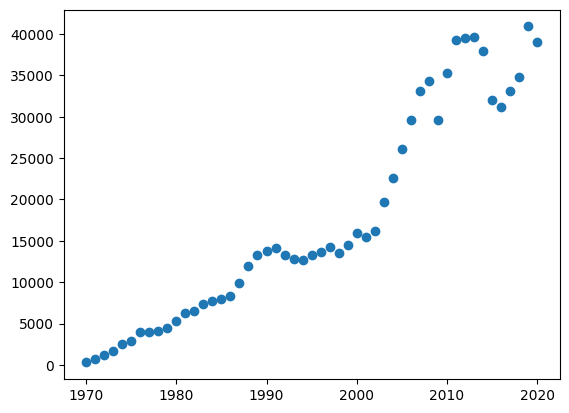

In [37]:
plt.scatter(X,y)

In [39]:
#Fiiting into SLR model
#reshape to (-1,1)
reg = LinearRegression()
reg.fit(X.reshape(-1,1),y)

LinearRegression()

In [40]:
reg.coef_

array([829.15773756])

In [43]:
reg.intercept_

np.float64(-1636692.7844645553)

In [46]:
r2_score(X, y)

-1859956.8346606335

In [48]:
dfr.corr()

,year,Sales
year,1.000000,0.954028
Sales,0.954028,1.000000


In [53]:
from scipy.stats import chi2_contingency, chi2
df3 = pd.read_csv("/content/iitm_onlineDegree.csv")

In [50]:
df3.describe()

,Gender,Preference
count,732,732
unique,2,3
top,Female,Statistics
freq,433,324


In [54]:
contingency_table = pd.crosstab(df3['Gender'], df3['Preference'])
print("\nContingency Table:\n", contingency_table)


Contingency Table:
 Preference  Business  Programming  Statistics
Gender                                       
Female           175           58         200
Male             139           36         124


In [55]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

In [56]:
print("\nChi-square Statistic =", chi2_stat)
print("Degrees of Freedom =", dof)
print("p-value =", p_value)



Chi-square Statistic = 2.662658927192708
Degrees of Freedom = 2
p-value = 0.26412588203358844


In [ ]:

#p = 0.2641 > 0.05 also

In [57]:
# Step 5: Find the critical (tabulated) Chi-square value
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dof)
print("Critical (Tabulated) Chi-square Value =", critical_value)
#2.66 < 5.99 fail to reject ho => independent

Critical (Tabulated) Chi-square Value = 5.991464547107979
